In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Choice of dates

In [2]:
initial_date = '2011-01-01'
end_date = '2024-12-31'

In [3]:
source = yf.download(['^GSPC'], start=initial_date, end=end_date)[['Close']]
df_base = source[['Close']]
df_base.dropna(axis=1, inplace=True)
df_base.reset_index(inplace=True)
df_base.rename(columns={'Date':'ds'}, inplace=True)
df_base.set_index('ds', inplace=True)
df_base = df_base.reset_index()
df_base.columns = df_base.columns.droplevel(0)
df_base.rename(columns={'': 'ds'}, inplace=True)
df_base.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,ds,^GSPC
0,2011-01-03,1271.869995
1,2011-01-04,1270.199951
2,2011-01-05,1276.560059
3,2011-01-06,1273.849976
4,2011-01-07,1271.500000


<Axes: xlabel='ds', ylabel='^GSPC'>

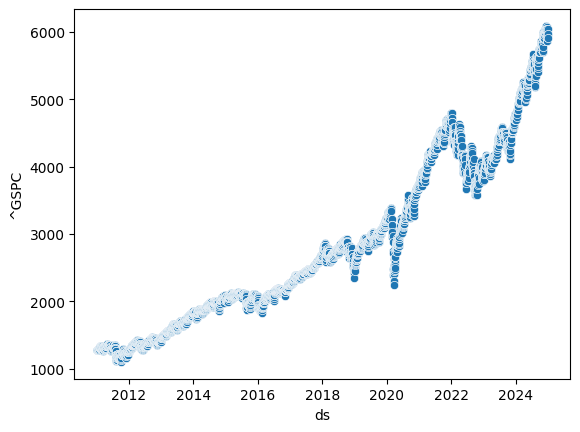

In [4]:
sns.scatterplot(data = df_base, x='ds', y='^GSPC')

In [5]:
benchmark = yf.download('^OEX', start=initial_date)['Close']
benchmark.reset_index(inplace=True)
benchmark.rename(columns={'Date':'ds'}, inplace=True)
benchmark.set_index('ds', inplace=True)
benchmark.head()

[*********************100%***********************]  1 of 1 completed


Ticker,^OEX
ds,
2011-01-03,572.229980
2011-01-04,573.229980
2011-01-05,576.000000
2011-01-06,574.729980
2011-01-07,573.380005


The period between 2014 and 2017 looks interesting for a more thorough analysis

In [7]:
df_src = pd.read_pickle('/content/drive/MyDrive/data/stocks_adjclose.pkl')
df_src.head()

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WRB,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
ds,,,,,,,,,,,,,,,,,,,,,
2011-01-03,26.781836,9.917951,16.942663,9.349445,37.585785,31.290001,27.436106,20.712511,29.848969,39.270000,...,6.112024,18.971697,71.104691,11.828708,76.192101,14.700940,43.098133,26.977388,47.841393,38.200001
2011-01-04,26.532440,9.969709,17.102097,9.291334,37.338249,31.510000,27.125227,20.698887,29.741137,38.529999,...,6.072278,18.631702,69.911537,11.702991,78.568939,14.763333,43.300457,26.565216,47.206047,37.840000
2011-01-05,26.474880,10.051261,17.102097,9.305071,37.346004,32.220001,27.183071,20.794275,30.216925,41.240002,...,6.045782,18.713308,70.882263,12.068158,79.582596,14.675976,43.184826,26.691620,47.240875,37.799999
2011-01-06,26.526041,10.043136,17.066668,9.179339,37.485237,32.270000,27.334898,21.591436,30.451658,41.259998,...,5.977333,18.577297,71.084503,11.984348,80.162842,14.663502,43.462337,26.878460,45.778728,37.480000
2011-01-07,26.615564,10.115060,17.137522,9.109608,37.547104,32.040001,27.175838,21.768579,30.521458,40.759998,...,5.939793,18.486635,70.963158,12.313586,83.001091,14.794533,43.699345,27.213682,45.770027,37.599998


In [10]:
df_forecast = pd.read_pickle('/content/drive/MyDrive/data/stocks_pred.pkl').loc[:, df_src.columns]

In [11]:
df_forecast.head()

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WRB,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
ds,,,,,,,,,,,,,,,,,,,,,
2021-06-01,132.667728,121.799140,103.533455,37.895540,267.903917,490.080770,153.133331,60.534062,181.225693,282.736496,...,31.734964,337.507534,248.690080,32.564720,132.883703,61.876076,52.285650,112.392127,155.682273,495.221211
2021-06-02,133.284310,122.504541,100.512905,38.354049,267.344407,494.258298,152.891786,60.624199,179.663727,281.468645,...,31.739625,338.450117,247.866928,32.381583,132.791723,61.911148,52.618657,112.590525,155.917377,494.883824
2021-06-03,132.038919,121.677664,100.959995,37.768134,269.187706,490.436972,153.207881,61.077443,182.570350,281.302760,...,31.487271,335.148484,247.292869,32.073958,131.261962,62.808043,52.678994,112.005457,156.108430,498.648315
2021-06-04,133.020643,121.995169,102.729751,37.788334,268.353274,493.212788,152.886353,61.208476,182.597243,277.026472,...,31.412661,332.730373,243.826505,31.382831,126.293405,62.780525,53.111360,111.883259,153.656822,499.557579
2021-06-07,133.699332,123.030548,101.855076,38.177776,269.255590,500.590410,152.453153,61.486759,182.549189,282.400231,...,31.552372,331.919075,240.696224,31.348664,124.886461,62.398528,53.455977,111.634952,149.817534,507.167585


### Covariance Analysis

In [12]:
df_corr = df_src.corr()
df_corr.head()

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WRB,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.938434,0.972057,0.803930,0.973666,0.944446,0.958391,0.877209,0.950709,0.946486,...,0.915526,0.962450,0.952409,0.840455,-0.192150,0.925082,0.581125,0.957106,0.742547,0.926361
AAPL,0.938434,1.000000,0.925958,0.904199,0.965640,0.912658,0.974905,0.858673,0.957237,0.883810,...,0.954041,0.944027,0.944347,0.799052,-0.274004,0.864298,0.709763,0.932155,0.609996,0.834967
ABT,0.972057,0.925958,1.000000,0.780764,0.974008,0.966874,0.947089,0.840192,0.947416,0.967112,...,0.905557,0.957242,0.959083,0.826124,-0.199613,0.959269,0.502779,0.961910,0.787986,0.938066
ACGL,0.803930,0.904199,0.780764,1.000000,0.859009,0.772929,0.921957,0.746998,0.908116,0.731481,...,0.943648,0.783657,0.889515,0.726342,-0.175307,0.746701,0.854873,0.878777,0.539229,0.617688
ACN,0.973666,0.965640,0.974008,0.859009,1.000000,0.962718,0.975225,0.861665,0.975261,0.940212,...,0.947315,0.970085,0.967641,0.856489,-0.227554,0.926912,0.623003,0.971591,0.727454,0.899654


In [13]:
cov = df_corr.map(lambda x: abs(x)).sum()
cov_rank = cov.sort_values().rank(method='min').astype(int)
cov_rank

,0
Ticker,
TPR,1
BKR,2
GE,3
WYNN,4
DVN,5
...,...
TXN,435
TEL,436
ITW,437


In [14]:
return_rank = df_src.diff().sum(axis=0).sort_values().rank(method='min', ascending=False).astype(int)
return_rank

,0
Ticker,
APA,439
MOS,438
SLB,437
DVN,436
PCG,435
...,...
TDG,5
FICO,4
AZO,3


In [15]:
select_10 = (return_rank + cov_rank).sort_values().reset_index()['Ticker'].values[1:10]
select_10

array(['LLY', 'MCK', 'CHTR', 'GWW', 'AXON', 'REGN', 'RCL', 'RL', 'TSLA'],
      dtype=object)

In [16]:
select_100 = (return_rank + cov_rank).sort_values().reset_index()['Ticker'].values[1:100]
select_100

array(['LLY', 'MCK', 'CHTR', 'GWW', 'AXON', 'REGN', 'RCL', 'RL', 'TSLA',
       'TPL', 'MKTX', 'PWR', 'URI', 'TRGP', 'ZBRA', 'KLAC', 'NFLX',
       'ALGN', 'HUBB', 'AVGO', 'IBM', 'GE', 'BA', 'SPG', 'PH', 'GNRC',
       'ETN', 'BKNG', 'LULU', 'ERIE', 'DECK', 'AZO', 'WAB', 'EXPE',
       'CPAY', 'TDG', 'NVDA', 'BIIB', 'ULTA', 'TFX', 'SNPS', 'MPWR',
       'PODD', 'FDX', 'COST', 'LII', 'VRTX', 'TT', 'BLDR', 'MMM', 'HUM',
       'IT', 'CAT', 'ORLY', 'CAH', 'UAL', 'AMP', 'SBAC', 'UHS', 'ESS',
       'MHK', 'MTB', 'CDNS', 'GILD', 'EOG', 'WST', 'CRL', 'ADBE', 'COR',
       'GPN', 'GS', 'MSI', 'DIS', 'FFIV', 'JBL', 'IDXX', 'DE', 'CLX',
       'PGR', 'AJG', 'KKR', 'FRT', 'ADSK', 'DVA', 'VRSN', 'ANSS', 'HES',
       'XOM', 'CVX', 'MSCI', 'IRM', 'POOL', 'ISRG', 'INCY', 'TTWO', 'NVR',
       'COP', 'LIN', 'BDX'], dtype=object)

* Easy test: 10 stocks
* Medium test: 100 stocks
* Hard test: all 493 stocks



In [19]:
def fitness_function(weights, data):
    data_returns = np.log(data) - np.log(data.shift(1)) # next day - current_day
    data_returns = data_returns.dropna()
    portfolio_returns = np.dot(data_returns, weights)
    portfolio_mean = np.mean(portfolio_returns)
    portfolio_std = np.std(portfolio_returns)
    sharpe_ratio = (portfolio_mean / portfolio_std) * np.sqrt(252) # annualized ratio
    return sharpe_ratio

In [18]:
def genetic_algorithm(data, population_size=200, num_generations=100, mutation_rate=0.05, elitism=0.1):
    population = np.random.rand(population_size, len(data.columns))
    population = population / np.sum(population, axis=1)[:, np.newaxis]
    fitness = np.array([fitness_function(individual, data) for individual in population])
    for generation in range(num_generations):
        sorted_idx = np.argsort(fitness)[::-1]
        population = population[sorted_idx]
        fitness = fitness[sorted_idx]
        num_elites = int(elitism * population_size)
        offspring = population[:num_elites]
        parent1_idx = np.random.randint(num_elites, population_size, size=population_size-num_elites)
        parent2_idx = np.random.randint(num_elites, population_size, size=population_size-num_elites)
        parent1 = population[parent1_idx]
        parent2 = population[parent2_idx]
        crossover_prob = np.random.rand(population_size-num_elites, len(data.columns))
        crossover_mask = crossover_prob <= 0.5
        offspring_crossover = np.where(crossover_mask, parent1, parent2)
        mutation_prob = np.random.rand(population_size-num_elites, len(data.columns))
        mutation_mask = mutation_prob <= 0.5
        mutation_values = np.random.rand(population_size-num_elites, len(data.columns))
        mutation_direction = np.random.choice([-1, 1], size=(population_size - num_elites, len(data.columns)))
        offspring_mutation = np.where(mutation_mask, offspring_crossover + mutation_direction * mutation_values, offspring_crossover)
        population = np.vstack((population[:num_elites], offspring_mutation))
        fitness = np.array([fitness_function(individual, data) for individual in population])
    best_idx = np.argmax(fitness)
    best_individual = population[best_idx]
    print('Best Sharpe Ratio: ', np.max(fitness))
    return best_individual

In [20]:
def backtest_monthly(optimization_function, data, forecast, benchmark, initial_capital, period=21):
    portfolio_value = initial_capital
    portfolio_returns = []
    benchmark_returns = []
    #train_data = data.query('ds>=@start_train_date and ds<=@end_train_date')
    test_data = forecast.query('ds>=@start_test_date and ds<=@end_test_date')
    benchmark_data = benchmark.query('ds>=@start_test_date and ds<=@end_test_date')
    #test_data = data.iloc[-252:]

    weights_history = pd.DataFrame(index=test_data.index, columns=data.columns)
    portfolio_value_history = pd.Series(index=test_data.index, name='Portfolio Value', dtype='float')
    portfolio_value_history.iloc[0] = portfolio_value


    for i in range(len(test_data)):

        month_data = test_data.iloc[i:i+2, :]
        print(f'Current date: {month_data.index[-1]}')
        #display(month_data)
        train_data = data.loc[:month_data.index[0]]
        weights = optimization_function(train_data, population_size=100, num_generations=50, mutation_rate=0.01, elitism=0.01)
        weights[weights < 0] = 0
        weights /= weights.sum()

        weights_history.loc[month_data.index[-1]] = weights
        month_returns = month_data.pct_change() * weights
        #display(month_returns.head())

        for j in range(1, len(month_returns)):
            #print(j)
            day_returns = month_returns.iloc[j]
            #print(f'day_returns: {day_returns}')
            portfolio_value = (1 + day_returns.sum()) * portfolio_value
            #print(portfolio_value)
            portfolio_value_history.loc[month_returns.index[j]] = portfolio_value

        weights_history = weights_history.fillna(method='ffill')
        portfolio_return = month_returns.sum(axis=1).iloc[-1]
        portfolio_returns.append(portfolio_return)
        #print(f'portfolio_returns: {portfolio_returns}')
        benchmark_return = benchmark.iloc[i:i+2, :].pct_change().iloc[-1].values.tolist()[0]
        benchmark_returns.append(benchmark_return)
        #print(f'benchmark_returns: {benchmark_returns}')
        portfolio_cumulative_returns = np.cumprod([k + 1 for k in portfolio_returns])
        #print(f'portfolio_cumulative_returns: {portfolio_cumulative_returns}')
        benchmark_cumulative_returns = np.cumprod([k + 1 for k in  benchmark_returns])
        portfolio_mean_return = np.mean(portfolio_returns)
        benchmark_mean_return = np.mean(benchmark_returns)
        portfolio_volatility = np.std(portfolio_returns) * np.sqrt(12)
        benchmark_volatility = np.std(benchmark_returns) * np.sqrt(12)
        sharpe_ratio = (portfolio_mean_return - 0.015) / portfolio_volatility
        benchmark_sharpe_ratio = (benchmark_mean_return - 0.015) / benchmark_volatility

        # Portfolio & Benchmark value
        benchmark_value = initial_capital * benchmark_cumulative_returns[-1]
        portfolio_value = initial_capital * portfolio_cumulative_returns[-1]




        # Print the portfolio statistics
        print('Portfolio Statistics:')
        print('---------------------')
        print(f'Mean Daily Return: {portfolio_mean_return:.2%}')
        print(f'Standard Deviation: {portfolio_volatility:.2%}')
        print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
        print('Final Value: {:.2f}'.format(portfolio_value))
        print()

        # Print the benchmark statistics
        print('Benchmark Statistics:')
        print('---------------------')
        print(f'Mean Daily Return: {benchmark_mean_return:.2%}')
        print(f'Standard Deviation: {benchmark_volatility:.2%}')
        print(f'Sharpe Ratio: {benchmark_sharpe_ratio:.2f}')
        print('Final Value: {:.2f}'.format(benchmark_value))
        print()

        # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_cumulative_returns, label='Portfolio')
    plt.plot(benchmark_cumulative_returns, label='Benchmark')
    plt.legend(loc='upper left')
    plt.title('Backtesting Results')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.show()


    return weights_history, portfolio_value_history, portfolio_cumulative_returns, benchmark_cumulative_returns



Easy test: 10 stocks

In [21]:
data_10 = df_src[select_10]
df_forecast_10 = df_forecast[select_10]

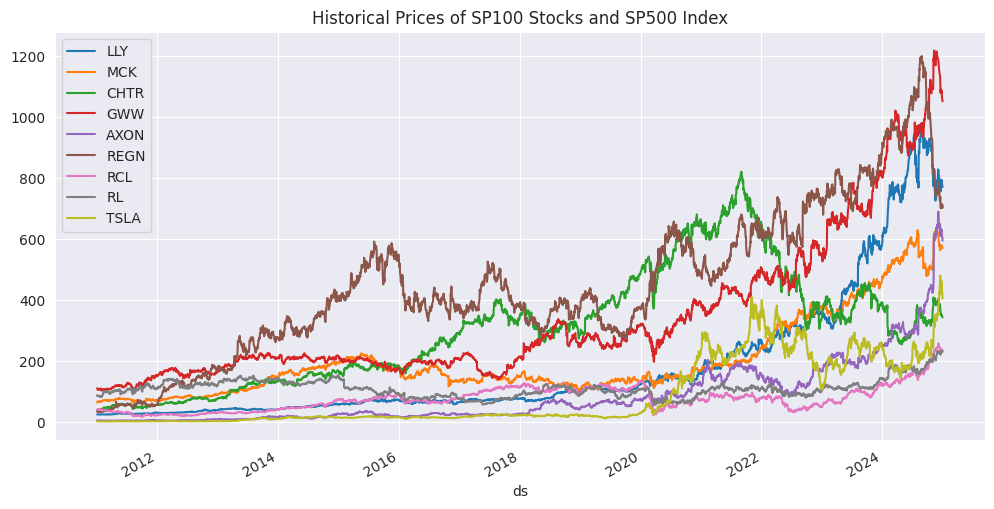

In [22]:
sns.set_style('darkgrid')
data_10.plot(figsize=(12,6))
plt.title('Historical Prices of SP100 Stocks and SP500 Index')
plt.legend(loc='upper left')
plt.show()

In [23]:
start_train_date = '2011-01-01'
end_train_date = '2021-05-31'
start_test_date = '2021-06-01'
end_test_date = '2021-07-01'

Current date: 2021-06-02 00:00:00
Best Sharpe Ratio:  1.3047151209275059
Portfolio Statistics:
---------------------
Mean Daily Return: -0.06%
Standard Deviation: 0.00%
Sharpe Ratio: -inf
Final Value: 999.43

Benchmark Statistics:
---------------------
Mean Daily Return: 0.17%
Standard Deviation: 0.00%
Sharpe Ratio: -inf
Final Value: 1001.75

Current date: 2021-06-03 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')
<ipython-input-20-80b370c630dd>:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weights_history = weights_history.fillna(method='ffill')
<ipython-input-20-80b370c630dd>:51: RuntimeWarning: divide by zero encountered in scalar divide
  sharpe_ratio = (portfolio_mean_return - 0.015) / portfolio_volatility
<ipython-input-20-80b370c630dd>:52: RuntimeWarning: divide by zero encountered in scalar divide
  benchmark_sharpe_ratio = (benchmark_mean_return - 0.015) / benchmark_volatility


Best Sharpe Ratio:  1.2737131610398877
Portfolio Statistics:
---------------------
Mean Daily Return: 0.05%
Standard Deviation: 0.37%
Sharpe Ratio: -3.91
Final Value: 1000.99

Benchmark Statistics:
---------------------
Mean Daily Return: 0.33%
Standard Deviation: 0.53%
Sharpe Ratio: -2.19
Final Value: 1006.59

Current date: 2021-06-04 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2663626360138676
Portfolio Statistics:
---------------------
Mean Daily Return: -0.42%
Standard Deviation: 2.31%
Sharpe Ratio: -0.83
Final Value: 987.44

Benchmark Statistics:
---------------------
Mean Daily Return: 0.15%
Standard Deviation: 1.00%
Sharpe Ratio: -1.36
Final Value: 1004.37

Current date: 2021-06-07 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3371359470458597
Portfolio Statistics:
---------------------
Mean Daily Return: -0.24%
Standard Deviation: 2.26%
Sharpe Ratio: -0.77
Final Value: 990.19

Benchmark Statistics:
---------------------
Mean Daily Return: 0.05%
Standard Deviation: 1.04%
Sharpe Ratio: -1.40
Final Value: 1002.01

Current date: 2021-06-08 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2723863872441146
Portfolio Statistics:
---------------------
Mean Daily Return: 0.05%
Standard Deviation: 2.85%
Sharpe Ratio: -0.51
Final Value: 1002.10

Benchmark Statistics:
---------------------
Mean Daily Return: -0.00%
Standard Deviation: 1.00%
Sharpe Ratio: -1.50
Final Value: 999.77

Current date: 2021-06-09 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2931043601577232
Portfolio Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.68%
Sharpe Ratio: -0.51
Final Value: 1007.64

Benchmark Statistics:
---------------------
Mean Daily Return: 0.05%
Standard Deviation: 1.00%
Sharpe Ratio: -1.46
Final Value: 1002.81

Current date: 2021-06-10 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2987461649895642
Portfolio Statistics:
---------------------
Mean Daily Return: 0.18%
Standard Deviation: 2.51%
Sharpe Ratio: -0.53
Final Value: 1012.24

Benchmark Statistics:
---------------------
Mean Daily Return: 0.17%
Standard Deviation: 1.41%
Sharpe Ratio: -0.94
Final Value: 1012.13

Current date: 2021-06-11 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3188018586488532
Portfolio Statistics:
---------------------
Mean Daily Return: 0.27%
Standard Deviation: 2.50%
Sharpe Ratio: -0.49
Final Value: 1021.62

Benchmark Statistics:
---------------------
Mean Daily Return: 0.12%
Standard Deviation: 1.41%
Sharpe Ratio: -0.98
Final Value: 1009.63

Current date: 2021-06-14 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3636923630361617
Portfolio Statistics:
---------------------
Mean Daily Return: 0.22%
Standard Deviation: 2.41%
Sharpe Ratio: -0.53
Final Value: 1019.77

Benchmark Statistics:
---------------------
Mean Daily Return: 0.20%
Standard Deviation: 1.51%
Sharpe Ratio: -0.86
Final Value: 1017.63

Current date: 2021-06-15 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.266500361821726
Portfolio Statistics:
---------------------
Mean Daily Return: 0.26%
Standard Deviation: 2.31%
Sharpe Ratio: -0.54
Final Value: 1025.61

Benchmark Statistics:
---------------------
Mean Daily Return: 0.18%
Standard Deviation: 1.45%
Sharpe Ratio: -0.91
Final Value: 1017.67

Current date: 2021-06-16 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3655885413123638
Portfolio Statistics:
---------------------
Mean Daily Return: 0.26%
Standard Deviation: 2.21%
Sharpe Ratio: -0.56
Final Value: 1028.67

Benchmark Statistics:
---------------------
Mean Daily Return: 0.08%
Standard Deviation: 1.71%
Sharpe Ratio: -0.83
Final Value: 1009.16

Current date: 2021-06-17 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3170723154115755
Portfolio Statistics:
---------------------
Mean Daily Return: 0.16%
Standard Deviation: 2.42%
Sharpe Ratio: -0.56
Final Value: 1018.73

Benchmark Statistics:
---------------------
Mean Daily Return: 0.08%
Standard Deviation: 1.64%
Sharpe Ratio: -0.87
Final Value: 1009.16

Current date: 2021-06-18 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2858621423894119
Portfolio Statistics:
---------------------
Mean Daily Return: 0.16%
Standard Deviation: 2.32%
Sharpe Ratio: -0.58
Final Value: 1020.40

Benchmark Statistics:
---------------------
Mean Daily Return: 0.10%
Standard Deviation: 1.60%
Sharpe Ratio: -0.88
Final Value: 1012.79

Current date: 2021-06-21 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.283506091300373
Portfolio Statistics:
---------------------
Mean Daily Return: 0.10%
Standard Deviation: 2.35%
Sharpe Ratio: -0.60
Final Value: 1013.77

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 1.60%
Sharpe Ratio: -0.85
Final Value: 1018.75

Current date: 2021-06-22 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2763425815294644
Portfolio Statistics:
---------------------
Mean Daily Return: 0.10%
Standard Deviation: 2.27%
Sharpe Ratio: -0.62
Final Value: 1014.80

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 1.55%
Sharpe Ratio: -0.89
Final Value: 1019.35

Current date: 2021-06-23 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2615096434035873
Portfolio Statistics:
---------------------
Mean Daily Return: 0.11%
Standard Deviation: 2.20%
Sharpe Ratio: -0.63
Final Value: 1017.09

Benchmark Statistics:
---------------------
Mean Daily Return: 0.14%
Standard Deviation: 1.50%
Sharpe Ratio: -0.91
Final Value: 1022.11

Current date: 2021-06-24 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.321677674308429
Portfolio Statistics:
---------------------
Mean Daily Return: 0.18%
Standard Deviation: 2.34%
Sharpe Ratio: -0.56
Final Value: 1030.25

Benchmark Statistics:
---------------------
Mean Daily Return: 0.14%
Standard Deviation: 1.46%
Sharpe Ratio: -0.93
Final Value: 1023.57

Current date: 2021-06-25 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3341501276741274
Portfolio Statistics:
---------------------
Mean Daily Return: 0.23%
Standard Deviation: 2.40%
Sharpe Ratio: -0.53
Final Value: 1041.87

Benchmark Statistics:
---------------------
Mean Daily Return: 0.03%
Standard Deviation: 2.05%
Sharpe Ratio: -0.72
Final Value: 1005.96

Current date: 2021-06-28 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3291128052713959
Portfolio Statistics:
---------------------
Mean Daily Return: 0.24%
Standard Deviation: 2.34%
Sharpe Ratio: -0.54
Final Value: 1045.23

Benchmark Statistics:
---------------------
Mean Daily Return: 0.07%
Standard Deviation: 2.04%
Sharpe Ratio: -0.70
Final Value: 1012.23

Current date: 2021-06-29 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2993991258757858
Portfolio Statistics:
---------------------
Mean Daily Return: 0.24%
Standard Deviation: 2.28%
Sharpe Ratio: -0.55
Final Value: 1048.85

Benchmark Statistics:
---------------------
Mean Daily Return: 0.15%
Standard Deviation: 2.37%
Sharpe Ratio: -0.57
Final Value: 1030.25

Current date: 2021-06-30 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.291003008421949
Portfolio Statistics:
---------------------
Mean Daily Return: 0.27%
Standard Deviation: 2.26%
Sharpe Ratio: -0.55
Final Value: 1057.10

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.34%
Sharpe Ratio: -0.59
Final Value: 1027.17

Current date: 2021-07-01 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3158363198584193
Portfolio Statistics:
---------------------
Mean Daily Return: 0.27%
Standard Deviation: 2.21%
Sharpe Ratio: -0.56
Final Value: 1060.27

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.29%
Sharpe Ratio: -0.60
Final Value: 1029.48

Current date: 2021-07-01 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3353355856635567
Portfolio Statistics:
---------------------
Mean Daily Return: 0.26%
Standard Deviation: 2.17%
Sharpe Ratio: -0.57
Final Value: 1060.27

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.24%
Sharpe Ratio: -0.61
Final Value: 1030.51



<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


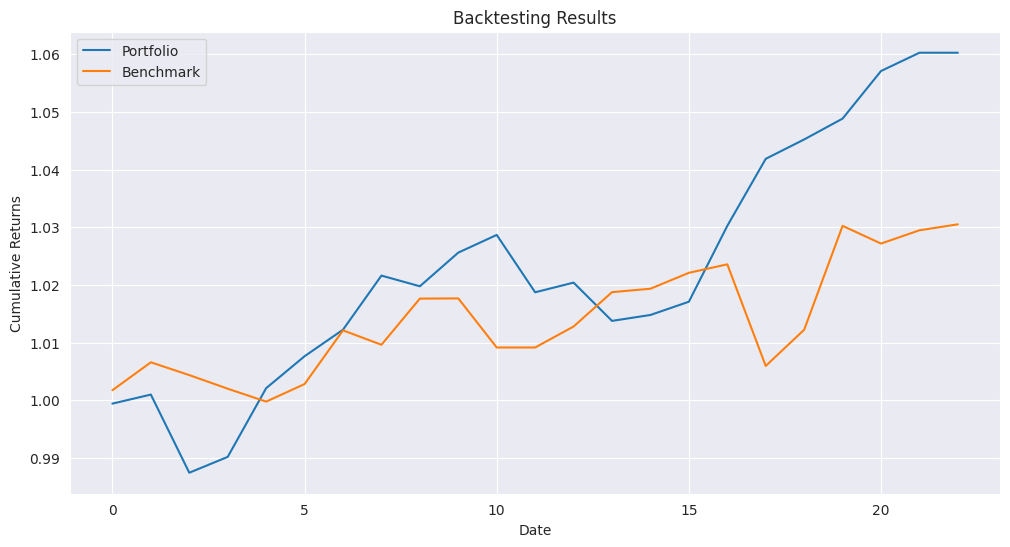

In [24]:
weights_history, portfolio_value_history, portfolio_cumulative_returns, benchmark_cumulative_returns = backtest_monthly(genetic_algorithm, data_10, df_forecast_10, benchmark, initial_capital=1000)

In [ ]:
weights_history.head()

Ticker,LLY,MCK,GWW,CHTR,AXON,REGN,RCL,RL,TSLA
ds,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.081657,0.000000,0.003644,0.543349,0.002295,0.165331,0.0,0.000000,0.203724
2018-01-04,0.305105,0.005972,0.000000,0.454369,0.014499,0.027738,0.0,0.037147,0.155170
2018-01-05,0.163146,0.000000,0.033453,0.327994,0.081978,0.181600,0.0,0.000000,0.211829
2018-01-08,0.136365,0.000000,0.000000,0.438635,0.052948,0.195543,0.0,0.000000,0.176509


Ticker,LLY,MCK,GWW,CHTR,AXON,REGN,RCL,RL,TSLA
ds,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.079264,0.000000,0.19260,0.409333,0.065751,0.161904,0.000000,0.0,0.091147
2018-01-04,0.224227,0.000000,0.00000,0.322972,0.000000,0.184448,0.034922,0.0,0.233431
2018-01-05,0.108482,0.097487,0.10437,0.314946,0.041340,0.185978,0.000000,0.0,0.147397
2018-01-08,0.423056,0.000000,0.00000,0.256959,0.124469,0.072406,0.061696,0.0,0.061415


In [27]:
weights_history.to_pickle('/content/drive/MyDrive/ga_results/weights_history_10_forecast.pkl')
portfolio_value_history.to_pickle('/content/drive/MyDrive/ga_results/portfolio_value_history_10_forecast.pkl')
np.save('/content/drive/MyDrive/ga_results/portfolio_cumulative_returns_10_forecast.pkl', portfolio_cumulative_returns)
np.save('/content/drive/MyDrive/ga_results/benchmark_cumulative_returns_10_forecast.pkl', benchmark_cumulative_returns)

Medium test: 100 stocks

In [28]:
data_100 = df_src[select_100]
df_forecast_100 = df_forecast[select_100]

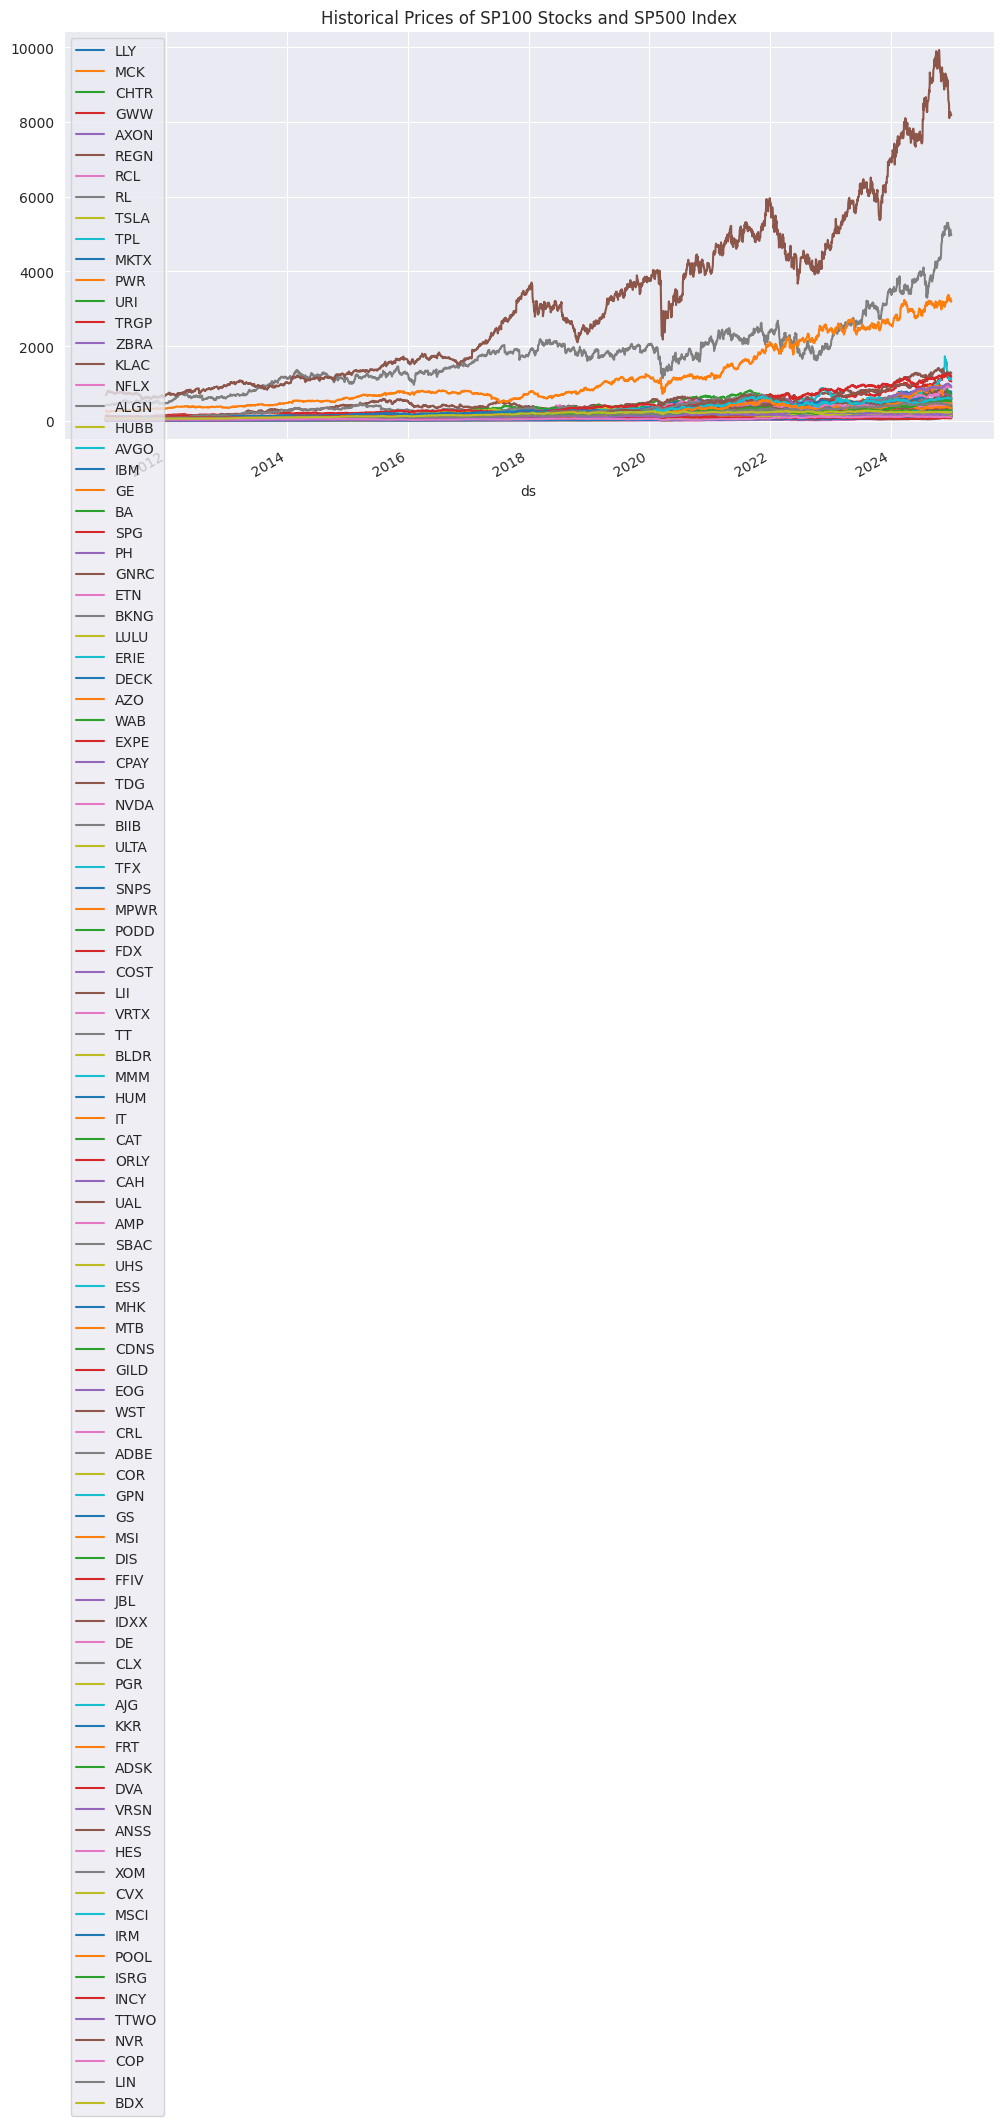

In [29]:
sns.set_style('darkgrid')
data_100.plot(figsize=(12,6))
plt.title('Historical Prices of SP100 Stocks and SP500 Index')
plt.legend(loc='upper left')
plt.show()

Current date: 2021-06-02 00:00:00
Best Sharpe Ratio:  1.3068974811579412
Portfolio Statistics:
---------------------
Mean Daily Return: 0.14%
Standard Deviation: 0.00%
Sharpe Ratio: -inf
Final Value: 1001.44

Benchmark Statistics:
---------------------
Mean Daily Return: 0.17%
Standard Deviation: 0.00%
Sharpe Ratio: -inf
Final Value: 1001.75

Current date: 2021-06-03 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')
<ipython-input-20-80b370c630dd>:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weights_history = weights_history.fillna(method='ffill')
<ipython-input-20-80b370c630dd>:51: RuntimeWarning: divide by zero encountered in scalar divide
  sharpe_ratio = (portfolio_mean_return - 0.015) / portfolio_volatility
<ipython-input-20-80b370c630dd>:52: RuntimeWarning: divide by zero encountered in scalar divide
  benchmark_sharpe_ratio = (benchmark_mean_return - 0.015) / benchmark_volatility


Best Sharpe Ratio:  1.3005073185540552
Portfolio Statistics:
---------------------
Mean Daily Return: -0.01%
Standard Deviation: 0.54%
Sharpe Ratio: -2.81
Final Value: 999.78

Benchmark Statistics:
---------------------
Mean Daily Return: 0.33%
Standard Deviation: 0.53%
Sharpe Ratio: -2.19
Final Value: 1006.59

Current date: 2021-06-04 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.416252268784448
Portfolio Statistics:
---------------------
Mean Daily Return: -0.04%
Standard Deviation: 0.46%
Sharpe Ratio: -3.32
Final Value: 998.74

Benchmark Statistics:
---------------------
Mean Daily Return: 0.15%
Standard Deviation: 1.00%
Sharpe Ratio: -1.36
Final Value: 1004.37

Current date: 2021-06-07 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2384606969591496
Portfolio Statistics:
---------------------
Mean Daily Return: 0.07%
Standard Deviation: 0.76%
Sharpe Ratio: -1.89
Final Value: 1002.61

Benchmark Statistics:
---------------------
Mean Daily Return: 0.05%
Standard Deviation: 1.04%
Sharpe Ratio: -1.40
Final Value: 1002.01

Current date: 2021-06-08 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.4234185540892146
Portfolio Statistics:
---------------------
Mean Daily Return: -0.00%
Standard Deviation: 0.83%
Sharpe Ratio: -1.82
Final Value: 999.87

Benchmark Statistics:
---------------------
Mean Daily Return: -0.00%
Standard Deviation: 1.00%
Sharpe Ratio: -1.50
Final Value: 999.77

Current date: 2021-06-09 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2932327790219638
Portfolio Statistics:
---------------------
Mean Daily Return: 0.01%
Standard Deviation: 0.76%
Sharpe Ratio: -1.95
Final Value: 1000.81

Benchmark Statistics:
---------------------
Mean Daily Return: 0.05%
Standard Deviation: 1.00%
Sharpe Ratio: -1.46
Final Value: 1002.81

Current date: 2021-06-10 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.1810248272363693
Portfolio Statistics:
---------------------
Mean Daily Return: 0.03%
Standard Deviation: 0.73%
Sharpe Ratio: -2.02
Final Value: 1002.29

Benchmark Statistics:
---------------------
Mean Daily Return: 0.17%
Standard Deviation: 1.41%
Sharpe Ratio: -0.94
Final Value: 1012.13

Current date: 2021-06-11 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.1252941402505179
Portfolio Statistics:
---------------------
Mean Daily Return: 0.07%
Standard Deviation: 0.74%
Sharpe Ratio: -1.93
Final Value: 1005.29

Benchmark Statistics:
---------------------
Mean Daily Return: 0.12%
Standard Deviation: 1.41%
Sharpe Ratio: -0.98
Final Value: 1009.63

Current date: 2021-06-14 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2180753411414156
Portfolio Statistics:
---------------------
Mean Daily Return: 0.07%
Standard Deviation: 0.71%
Sharpe Ratio: -2.02
Final Value: 1006.74

Benchmark Statistics:
---------------------
Mean Daily Return: 0.20%
Standard Deviation: 1.51%
Sharpe Ratio: -0.86
Final Value: 1017.63

Current date: 2021-06-15 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2766709745179798
Portfolio Statistics:
---------------------
Mean Daily Return: 0.06%
Standard Deviation: 0.69%
Sharpe Ratio: -2.10
Final Value: 1006.02

Benchmark Statistics:
---------------------
Mean Daily Return: 0.18%
Standard Deviation: 1.45%
Sharpe Ratio: -0.91
Final Value: 1017.67

Current date: 2021-06-16 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3721711947204336
Portfolio Statistics:
---------------------
Mean Daily Return: 0.06%
Standard Deviation: 0.66%
Sharpe Ratio: -2.20
Final Value: 1006.45

Benchmark Statistics:
---------------------
Mean Daily Return: 0.08%
Standard Deviation: 1.71%
Sharpe Ratio: -0.83
Final Value: 1009.16

Current date: 2021-06-17 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.298232154981911
Portfolio Statistics:
---------------------
Mean Daily Return: 0.04%
Standard Deviation: 0.68%
Sharpe Ratio: -2.15
Final Value: 1004.21

Benchmark Statistics:
---------------------
Mean Daily Return: 0.08%
Standard Deviation: 1.64%
Sharpe Ratio: -0.87
Final Value: 1009.16

Current date: 2021-06-18 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3468617688621607
Portfolio Statistics:
---------------------
Mean Daily Return: -0.00%
Standard Deviation: 0.79%
Sharpe Ratio: -1.90
Final Value: 999.75

Benchmark Statistics:
---------------------
Mean Daily Return: 0.10%
Standard Deviation: 1.60%
Sharpe Ratio: -0.88
Final Value: 1012.79

Current date: 2021-06-21 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3244867976681767
Portfolio Statistics:
---------------------
Mean Daily Return: -0.07%
Standard Deviation: 1.12%
Sharpe Ratio: -1.40
Final Value: 990.48

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 1.60%
Sharpe Ratio: -0.85
Final Value: 1018.75

Current date: 2021-06-22 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3210967508959852
Portfolio Statistics:
---------------------
Mean Daily Return: 0.02%
Standard Deviation: 1.61%
Sharpe Ratio: -0.92
Final Value: 1003.41

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 1.55%
Sharpe Ratio: -0.89
Final Value: 1019.35

Current date: 2021-06-23 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.294900806589738
Portfolio Statistics:
---------------------
Mean Daily Return: 0.06%
Standard Deviation: 1.63%
Sharpe Ratio: -0.88
Final Value: 1009.60

Benchmark Statistics:
---------------------
Mean Daily Return: 0.14%
Standard Deviation: 1.50%
Sharpe Ratio: -0.91
Final Value: 1022.11

Current date: 2021-06-24 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3948476173625783
Portfolio Statistics:
---------------------
Mean Daily Return: 0.09%
Standard Deviation: 1.65%
Sharpe Ratio: -0.85
Final Value: 1015.72

Benchmark Statistics:
---------------------
Mean Daily Return: 0.14%
Standard Deviation: 1.46%
Sharpe Ratio: -0.93
Final Value: 1023.57

Current date: 2021-06-25 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.2384896251255717
Portfolio Statistics:
---------------------
Mean Daily Return: 0.12%
Standard Deviation: 1.65%
Sharpe Ratio: -0.84
Final Value: 1021.62

Benchmark Statistics:
---------------------
Mean Daily Return: 0.03%
Standard Deviation: 2.05%
Sharpe Ratio: -0.72
Final Value: 1005.96

Current date: 2021-06-28 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3635754266302125
Portfolio Statistics:
---------------------
Mean Daily Return: 0.14%
Standard Deviation: 1.64%
Sharpe Ratio: -0.83
Final Value: 1027.27

Benchmark Statistics:
---------------------
Mean Daily Return: 0.07%
Standard Deviation: 2.04%
Sharpe Ratio: -0.70
Final Value: 1012.23

Current date: 2021-06-29 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.303231451466542
Portfolio Statistics:
---------------------
Mean Daily Return: 0.16%
Standard Deviation: 1.61%
Sharpe Ratio: -0.83
Final Value: 1031.90

Benchmark Statistics:
---------------------
Mean Daily Return: 0.15%
Standard Deviation: 2.37%
Sharpe Ratio: -0.57
Final Value: 1030.25

Current date: 2021-06-30 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.4280317705751362
Portfolio Statistics:
---------------------
Mean Daily Return: 0.16%
Standard Deviation: 1.57%
Sharpe Ratio: -0.85
Final Value: 1034.35

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.34%
Sharpe Ratio: -0.59
Final Value: 1027.17

Current date: 2021-07-01 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.35241882067564
Portfolio Statistics:
---------------------
Mean Daily Return: 0.17%
Standard Deviation: 1.55%
Sharpe Ratio: -0.86
Final Value: 1038.41

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.29%
Sharpe Ratio: -0.60
Final Value: 1029.48

Current date: 2021-07-01 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Best Sharpe Ratio:  1.3939626598285386
Portfolio Statistics:
---------------------
Mean Daily Return: 0.16%
Standard Deviation: 1.52%
Sharpe Ratio: -0.88
Final Value: 1038.41

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.24%
Sharpe Ratio: -0.61
Final Value: 1030.51



<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


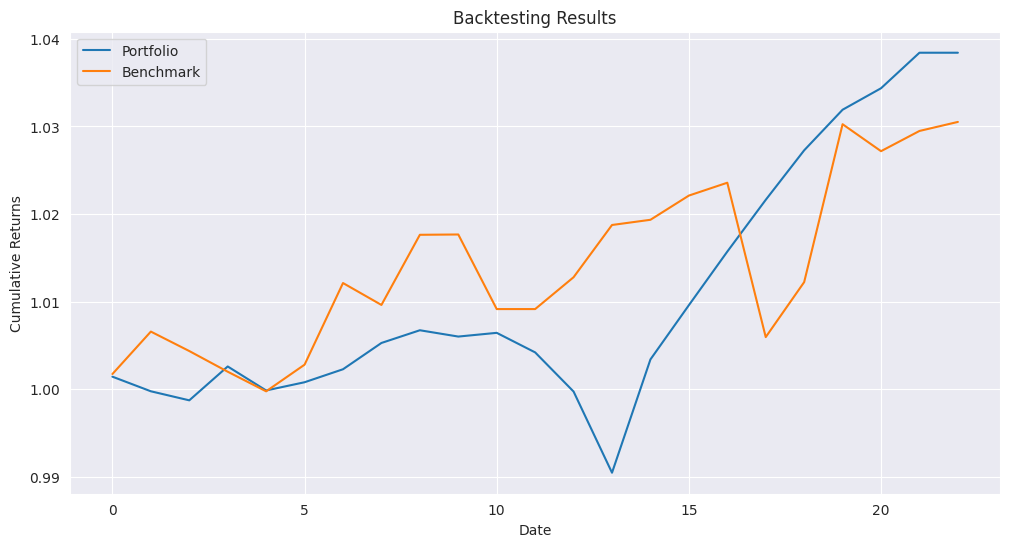

In [30]:
weights_history, portfolio_value_history, portfolio_cumulative_returns, benchmark_cumulative_returns = backtest_monthly(genetic_algorithm, data_100, df_forecast_100, benchmark, initial_capital=1000)

In [31]:
weights_history.to_pickle('/content/drive/MyDrive/ga_results/weights_history_100_forecast.pkl')
portfolio_value_history.to_pickle('/content/drive/MyDrive/ga_results/portfolio_value_history_100_forecast.pkl')
np.save('/content/drive/MyDrive/ga_results/portfolio_cumulative_returns_100_forecast.pkl', portfolio_cumulative_returns)
np.save('/content/drive/MyDrive/ga_results/benchmark_cumulative_returns_100_forecast.pkl', benchmark_cumulative_returns)

Hard Test

In [32]:
data_all = df_src.copy()

Current date: 2021-06-02 00:00:00
Best Sharpe Ratio:  1.3922131314267996
Portfolio Statistics:
---------------------
Mean Daily Return: 0.15%
Standard Deviation: 0.00%
Sharpe Ratio: -inf
Final Value: 1001.53

Benchmark Statistics:
---------------------
Mean Daily Return: 0.17%
Standard Deviation: 0.00%
Sharpe Ratio: -inf
Final Value: 1001.75

Current date: 2021-06-03 00:00:00


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')
<ipython-input-20-80b370c630dd>:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weights_history = weights_history.fillna(method='ffill')
<ipython-input-20-80b370c630dd>:51: RuntimeWarning: divide by zero encountered in scalar divide
  sharpe_ratio = (portfolio_mean_return - 0.015) / portfolio_volatility
<ipython-input-20-80b370c630dd>:52: RuntimeWarning: divide by zero encountered in scalar divide
  benchmark_sharpe_ratio = (benchmark_mean_return - 0.015) / benchmark_volatility


Best Sharpe Ratio:  1.3435817966159174


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.11%
Standard Deviation: 0.14%
Sharpe Ratio: -9.96
Final Value: 1002.27

Benchmark Statistics:
---------------------
Mean Daily Return: 0.33%
Standard Deviation: 0.53%
Sharpe Ratio: -2.19
Final Value: 1006.59

Current date: 2021-06-04 00:00:00
Best Sharpe Ratio:  1.2869531646524317


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.04%
Standard Deviation: 0.40%
Sharpe Ratio: -3.67
Final Value: 1001.05

Benchmark Statistics:
---------------------
Mean Daily Return: 0.15%
Standard Deviation: 1.00%
Sharpe Ratio: -1.36
Final Value: 1004.37

Current date: 2021-06-07 00:00:00
Best Sharpe Ratio:  1.2420682024940435


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.09%
Standard Deviation: 0.48%
Sharpe Ratio: -2.93
Final Value: 1003.63

Benchmark Statistics:
---------------------
Mean Daily Return: 0.05%
Standard Deviation: 1.04%
Sharpe Ratio: -1.40
Final Value: 1002.01

Current date: 2021-06-08 00:00:00
Best Sharpe Ratio:  1.2081435204062811


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.08%
Standard Deviation: 0.44%
Sharpe Ratio: -3.25
Final Value: 1003.95

Benchmark Statistics:
---------------------
Mean Daily Return: -0.00%
Standard Deviation: 1.00%
Sharpe Ratio: -1.50
Final Value: 999.77

Current date: 2021-06-09 00:00:00
Best Sharpe Ratio:  1.2130400922852325


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.07%
Standard Deviation: 0.40%
Sharpe Ratio: -3.55
Final Value: 1004.45

Benchmark Statistics:
---------------------
Mean Daily Return: 0.05%
Standard Deviation: 1.00%
Sharpe Ratio: -1.46
Final Value: 1002.81

Current date: 2021-06-10 00:00:00
Best Sharpe Ratio:  1.137172119908188


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.04%
Standard Deviation: 0.49%
Sharpe Ratio: -2.99
Final Value: 1002.56

Benchmark Statistics:
---------------------
Mean Daily Return: 0.17%
Standard Deviation: 1.41%
Sharpe Ratio: -0.94
Final Value: 1012.13

Current date: 2021-06-11 00:00:00
Best Sharpe Ratio:  1.338647125776042


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.05%
Standard Deviation: 0.48%
Sharpe Ratio: -3.00
Final Value: 1004.25

Benchmark Statistics:
---------------------
Mean Daily Return: 0.12%
Standard Deviation: 1.41%
Sharpe Ratio: -0.98
Final Value: 1009.63

Current date: 2021-06-14 00:00:00
Best Sharpe Ratio:  1.24987893026963


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.06%
Standard Deviation: 0.47%
Sharpe Ratio: -3.09
Final Value: 1005.70

Benchmark Statistics:
---------------------
Mean Daily Return: 0.20%
Standard Deviation: 1.51%
Sharpe Ratio: -0.86
Final Value: 1017.63

Current date: 2021-06-15 00:00:00
Best Sharpe Ratio:  1.4759401590197956


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.03%
Standard Deviation: 0.58%
Sharpe Ratio: -2.53
Final Value: 1002.67

Benchmark Statistics:
---------------------
Mean Daily Return: 0.18%
Standard Deviation: 1.45%
Sharpe Ratio: -0.91
Final Value: 1017.67

Current date: 2021-06-16 00:00:00
Best Sharpe Ratio:  1.3675152827792962


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.03%
Standard Deviation: 0.56%
Sharpe Ratio: -2.65
Final Value: 1003.10

Benchmark Statistics:
---------------------
Mean Daily Return: 0.08%
Standard Deviation: 1.71%
Sharpe Ratio: -0.83
Final Value: 1009.16

Current date: 2021-06-17 00:00:00
Best Sharpe Ratio:  1.13663153502969


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: -0.00%
Standard Deviation: 0.63%
Sharpe Ratio: -2.39
Final Value: 999.88

Benchmark Statistics:
---------------------
Mean Daily Return: 0.08%
Standard Deviation: 1.64%
Sharpe Ratio: -0.87
Final Value: 1009.16

Current date: 2021-06-18 00:00:00
Best Sharpe Ratio:  1.3453556632037833


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: -0.05%
Standard Deviation: 0.85%
Sharpe Ratio: -1.82
Final Value: 993.37

Benchmark Statistics:
---------------------
Mean Daily Return: 0.10%
Standard Deviation: 1.60%
Sharpe Ratio: -0.88
Final Value: 1012.79

Current date: 2021-06-21 00:00:00
Best Sharpe Ratio:  1.3709130204015325


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: -0.14%
Standard Deviation: 1.39%
Sharpe Ratio: -1.18
Final Value: 980.36

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 1.60%
Sharpe Ratio: -0.85
Final Value: 1018.75

Current date: 2021-06-22 00:00:00
Best Sharpe Ratio:  1.254823045102009


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: -0.06%
Standard Deviation: 1.70%
Sharpe Ratio: -0.92
Final Value: 990.76

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 1.55%
Sharpe Ratio: -0.89
Final Value: 1019.35

Current date: 2021-06-23 00:00:00
Best Sharpe Ratio:  1.215789791350614


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: -0.05%
Standard Deviation: 1.65%
Sharpe Ratio: -0.94
Final Value: 991.60

Benchmark Statistics:
---------------------
Mean Daily Return: 0.14%
Standard Deviation: 1.50%
Sharpe Ratio: -0.91
Final Value: 1022.11

Current date: 2021-06-24 00:00:00
Best Sharpe Ratio:  1.240972446593516


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: -0.05%
Standard Deviation: 1.60%
Sharpe Ratio: -0.97
Final Value: 991.76

Benchmark Statistics:
---------------------
Mean Daily Return: 0.14%
Standard Deviation: 1.46%
Sharpe Ratio: -0.93
Final Value: 1023.57

Current date: 2021-06-25 00:00:00
Best Sharpe Ratio:  1.2818367854813508


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: -0.02%
Standard Deviation: 1.61%
Sharpe Ratio: -0.94
Final Value: 996.50

Benchmark Statistics:
---------------------
Mean Daily Return: 0.03%
Standard Deviation: 2.05%
Sharpe Ratio: -0.72
Final Value: 1005.96

Current date: 2021-06-28 00:00:00
Best Sharpe Ratio:  1.2216583759329773


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.01%
Standard Deviation: 1.63%
Sharpe Ratio: -0.91
Final Value: 1002.14

Benchmark Statistics:
---------------------
Mean Daily Return: 0.07%
Standard Deviation: 2.04%
Sharpe Ratio: -0.70
Final Value: 1012.23

Current date: 2021-06-29 00:00:00
Best Sharpe Ratio:  1.302438495645238


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.00%
Standard Deviation: 1.60%
Sharpe Ratio: -0.94
Final Value: 999.94

Benchmark Statistics:
---------------------
Mean Daily Return: 0.15%
Standard Deviation: 2.37%
Sharpe Ratio: -0.57
Final Value: 1030.25

Current date: 2021-06-30 00:00:00
Best Sharpe Ratio:  1.4842400599560426


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.00%
Standard Deviation: 1.56%
Sharpe Ratio: -0.96
Final Value: 1000.01

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.34%
Sharpe Ratio: -0.59
Final Value: 1027.17

Current date: 2021-07-01 00:00:00
Best Sharpe Ratio:  1.1786447110453129


<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


Portfolio Statistics:
---------------------
Mean Daily Return: 0.00%
Standard Deviation: 1.53%
Sharpe Ratio: -0.98
Final Value: 1000.68

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.29%
Sharpe Ratio: -0.60
Final Value: 1029.48

Current date: 2021-07-01 00:00:00
Best Sharpe Ratio:  1.301670228496421
Portfolio Statistics:
---------------------
Mean Daily Return: 0.00%
Standard Deviation: 1.49%
Sharpe Ratio: -1.00
Final Value: 1000.68

Benchmark Statistics:
---------------------
Mean Daily Return: 0.13%
Standard Deviation: 2.24%
Sharpe Ratio: -0.61
Final Value: 1030.51



<ipython-input-20-80b370c630dd>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_history = weights_history.fillna(method='ffill')


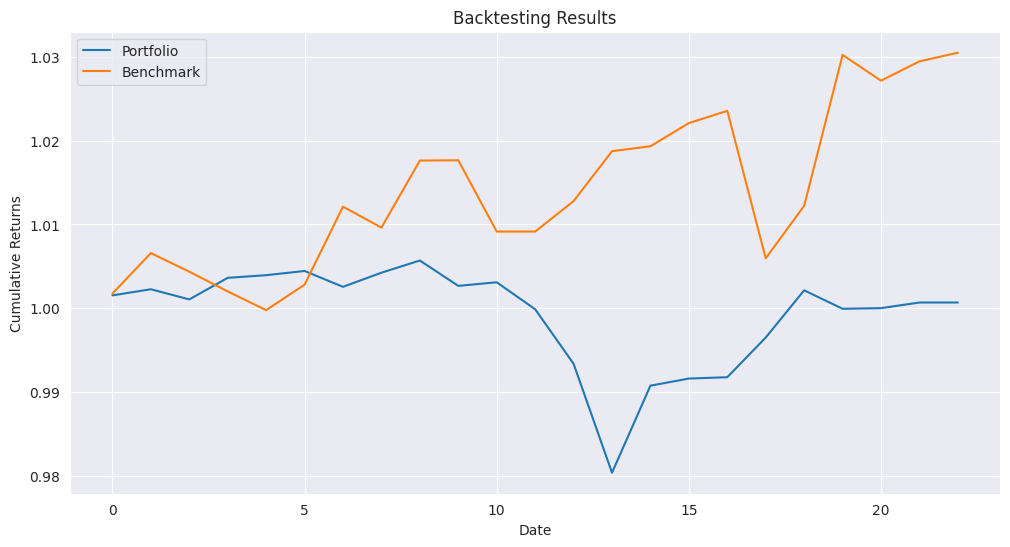

In [33]:
weights_history, portfolio_value_history, portfolio_cumulative_returns, benchmark_cumulative_returns = backtest_monthly(genetic_algorithm, data_all, df_forecast, benchmark, initial_capital=1000)

In [34]:
weights_history.to_pickle('/content/drive/MyDrive/ga_results/weights_history_all_forecast.pkl')
portfolio_value_history.to_pickle('/content/drive/MyDrive/ga_results/portfolio_value_history_all_forecast.pkl')
np.save('/content/drive/MyDrive/ga_results/portfolio_cumulative_returns_all_forecast.pkl', portfolio_cumulative_returns)
np.save('/content/drive/MyDrive/ga_results/benchmark_cumulative_returns_all_forecast.pkl', benchmark_cumulative_returns)